In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,precision_recall_curve
from sklearn.metrics import precision_recall_curve,f1_score, roc_auc_score

In [4]:
df_train = pd.read_csv('../data/train.csv')
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,2,3,1,0,1,244,10,1,0,0,0,85.85,0,1
1,2,0,0,3,1,0,1,276,9,1,0,0,0,95.00,0,1
2,2,0,1,2,1,0,1,233,10,1,0,0,0,90.00,0,1
3,2,0,2,2,1,0,1,156,7,1,0,0,0,93.08,1,1
4,2,0,0,3,1,0,1,76,4,1,0,0,0,69.33,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,1,0,2,5,1,0,1,34,11,1,0,0,0,74.80,2,1
29016,2,0,0,2,2,0,1,346,9,0,0,0,0,115.00,1,1
29017,3,0,0,4,1,0,4,175,8,1,0,0,0,130.05,1,1
29018,1,0,0,3,1,0,1,5,12,0,0,0,0,64.80,0,0


In [5]:
X = df_train.drop('booking_status', axis=1)
y = df_train['booking_status']

In [6]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

In [7]:
valor = y_resampled.value_counts()
suma = valor.sum()
porcentaje = valor*100/suma
print(porcentaje)

booking_status
0    50.0
1    50.0
Name: count, dtype: float64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [9]:
print(X_resampled.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18968, 15)
(15174, 15)
(15174,)
(3794, 15)
(3794,)


In [10]:
y_resampled.value_counts(normalize=True)

booking_status
0    0.5
1    0.5
Name: proportion, dtype: float64

In [11]:
y_train.value_counts(normalize=True)

booking_status
1    0.501582
0    0.498418
Name: proportion, dtype: float64

In [12]:
y_test.value_counts(normalize=True)

booking_status
0    0.506326
1    0.493674
Name: proportion, dtype: float64

In [13]:
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("classifier", RandomForestClassifier())
])

In [14]:
log_params = {
    'selectkbest__k':np.arange(10,20),
    'classifier': [LogisticRegression()],
    'classifier__C': [0.1,1,10]
}
rf_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k':np.arange(10,20),
    'classifier': [RandomForestClassifier()],
    'classifier__max_depth': [7,9,11]
}
gb_params = {
    'scaler': [StandardScaler(), None],
    'selectkbest__k':np.arange(10,20),
    'classifier': [GradientBoostingClassifier()],
    'classifier__max_depth': [7,9,11]
}
knn_params = {
    'selectkbest__k':np.arange(10,20),
    'classifier': [KNeighborsClassifier()],
    'classifier__n_neighbors': np.arange(10,20)
}
svm_params = {
    'selectkbest__k':np.arange(10,20),
    'classifier': [SVC()],
    'classifier__C': [0.1,1,10]
}

In [15]:
search_space = [
    log_params,
    rf_params,
    gb_params,
    knn_params,
    svm_params   
]

In [16]:
clf_gs = GridSearchCV(estimator=pipe, param_grid=search_space, cv=5, scoring="accuracy", verbose=3, n_jobs=-1)

In [19]:
clf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
560 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Us

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': [0.1, 1, 10],
                          'selectkbest__k': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth...
                          'selectkbest__k': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                          'selectkbest__k': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                         {'classifier': [SVC()], 'classifier__C': [0.1, 1, 10],
                          'selectkbest__k': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])}],
             scoring='accuracy', verbose=3)

In [20]:
print(clf_gs.best_estimator_)
print(clf_gs.best_score_)
print(clf_gs.best_params_)

Pipeline(steps=[('scaler', None), ('selectkbest', SelectKBest(k=15)),
                ('classifier', GradientBoostingClassifier(max_depth=11))])
0.8705017164068074
{'classifier': GradientBoostingClassifier(), 'classifier__max_depth': 11, 'scaler': None, 'selectkbest__k': 15}


In [21]:
final_model = clf_gs.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [22]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("confusion_matrix\n", confusion_matrix(y_test, y_pred))

accuracy_score 0.8769109119662625
precision_score 0.8841530054644808
recall_score 0.8638547784303257
roc_auc_score 0.8767477952536843
confusion_matrix
 [[1709  212]
 [ 255 1618]]


<Axes: >

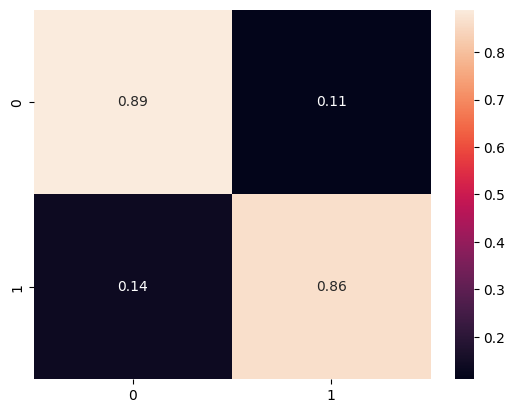

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True)

In [19]:
import pickle

filename = 'finished_model.pkl'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(final_model, archivo_salida)